## Imports

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

## 2.1

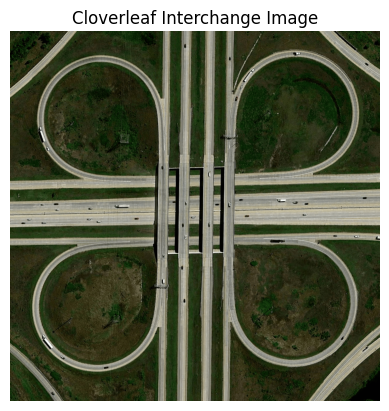

+-------------+-------+
|   Property  | Value |
+-------------+-------+
| Height (px) |  1207 |
|  Width (px) |  1207 |
|  Red (Min)  |   1   |
|  Red (Max)  |  250  |
| Green (Min) |   1   |
| Green (Max) |  253  |
|  Blue (Min) |   0   |
|  Blue (Max) |  249  |
+-------------+-------+


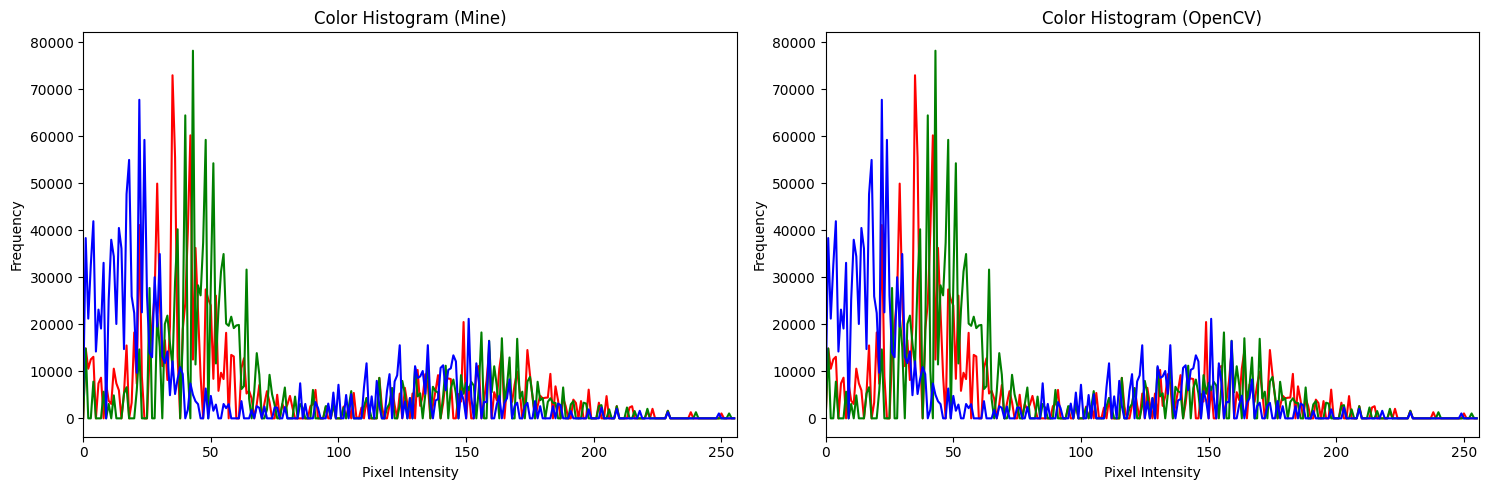

In [3]:
def load_cloverleaf_image(img_path="cloverleaf_interchange.png"):
    cloverleaf_interchange_img_bgr = cv2.imread(img_path)
    cloverleaf_img_rgb = cv2.cvtColor(cloverleaf_interchange_img_bgr, cv2.COLOR_BGR2RGB)
    return cloverleaf_img_rgb

# Displaying the image
cloverleaf_img = load_cloverleaf_image()
plt.imshow(cloverleaf_img)
plt.title("Cloverleaf Interchange Image")
plt.axis("off")
plt.show()

# Printing basic information about it
h, w, c = cloverleaf_img.shape

# Calculate min and max pixel values for each channel
r_min_px = cloverleaf_img[:, :, 0].min()
r_max_px = cloverleaf_img[:, :, 0].max()
g_min_px = cloverleaf_img[:, :, 1].min()
g_max_px = cloverleaf_img[:, :, 1].max()
b_min_px = cloverleaf_img[:, :, 2].min()
b_max_px = cloverleaf_img[:, :, 2].max()

# Create and populate the table
table = PrettyTable()
table.field_names = ["Property", "Value"]

table.add_row(["Height (px)", h])
table.add_row(["Width (px)", w])
table.add_row(["Red (Min)", r_min_px])
table.add_row(["Red (Max)", r_max_px])
table.add_row(["Green (Min)", g_min_px])
table.add_row(["Green (Max)", g_max_px])
table.add_row(["Blue (Min)", b_min_px])
table.add_row(["Blue (Max)", b_max_px])

# Print the table
print(table)

colors = ('r', 'g', 'b')

# Create a new figure for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# My Histogram
axes[0].set_title("Color Histogram (Mine)")
axes[0].set_xlabel("Pixel Intensity")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim([0, 256])

for channel in range(cloverleaf_img.shape[2]):  # Iterate through RGB channels
    channel_arr = cloverleaf_img[:, :, channel]
    hist = np.zeros(256)
    for i in range(256):
        hist[i] = np.sum(channel_arr == i)
    axes[0].plot(hist, color=colors[channel])

# OpenCV Histogram
axes[1].set_title("Color Histogram (OpenCV)")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")
axes[1].set_xlim([0, 256])

# ===========================================================================
# Below code has been generated by ChatGPT
#       Prompt: How to plot histogram of an image using opencv
# ===========================================================================
channels = cv2.split(cloverleaf_img)
for channel, color in zip(channels, colors):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    axes[1].plot(hist, color=color)
# ===========================================================================

# Display the figure
plt.tight_layout()
plt.show()

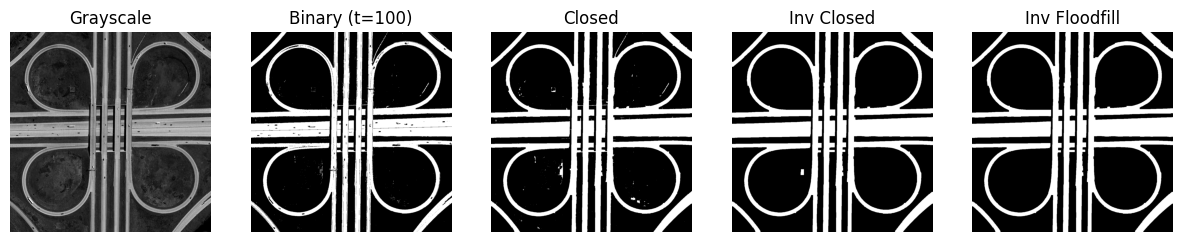

In [ ]:
def preprocess_image(image):
    image = image.astype(np.uint8)
    fig, ax = plt.subplots(1, 5, figsize=(15, 8))

    # Converting to grayscale
    bw_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ax[0].axis("off")
    ax[0].set_title("Grayscale")
    ax[0].imshow(bw_img, cmap="gray")

    # Thresholding to binary imge
    bw_img = np.where(bw_img > 100, np.uint8(255), 0)
    ax[1].axis("off")
    ax[1].set_title("Binary (t=100)")
    ax[1].imshow(bw_img, cmap="gray")

    # Closing to remove black artifacts
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))  # 10x10 rectangular kernel
    closed_img = cv2.morphologyEx(bw_img, cv2.MORPH_CLOSE, kernel)
    ax[2].axis("off")
    ax[2].set_title("Closed")
    ax[2].imshow(closed_img, cmap="gray")

    # Closing the inverted image ro remove white artifacts
    inverted_img = np.where(closed_img == 255, 0, np.uint8(255))
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 13))
    closed_img = cv2.morphologyEx(inverted_img, cv2.MORPH_CLOSE, kernel)
    bw_img = np.where(closed_img == 0, np.uint8(255), 0)
    ax[3].axis("off")
    ax[3].set_title("Inv Closed")
    ax[3].imshow(bw_img, cmap="gray")

    # Flood fill algorithm on inverted image to remove the remaining white spots too
    bw_img = np.where(bw_img == 255, 0, np.uint8(255))
    padded_bw_img = np.pad(bw_img, pad_width=1, mode='constant', constant_values=0)
    cv2.floodFill(padded_bw_img, None, (0, 0), 255)
    filled_hole_bw_img = bw_img | ~padded_bw_img[1:-1, 1:-1]
    filled_hole_bw_img = np.where(filled_hole_bw_img == 0, np.uint8(255), 0)
    ax[4].axis("off")
    ax[4].set_title("Inv Floodfill")
    ax[4].imshow(filled_hole_bw_img, cmap="gray")

    cv2.imwrite("flood_filled.png", filled_hole_bw_img)

    return filled_hole_bw_img

preprocessed_img = preprocess_image(cloverleaf_img)

> First, I turned the image to grayscale image because the color doesn’t matter for finding the leaves. Then, I used a threshold to separate the leaves (roads) from the background, adjusting it by trial and error to get it just right. Next, I used a closing (dialation followed by erosion) operation (fills small gaps) to get rid of tiny black spots (noise) inside the leaves. After that, I inverted the image so the leaves (roads) turned black, and then ran the same closing algorithm to get rid of the white noise (in the original image - black noise in the inverted image). Finally, I used flood fill to clean up any leftover tiny bits (again on the inverted image as I had to remove the white bits in the original image so black bits in the inverted image).

>Threshold = 100 (Decided by trial and error)

> For closing kernel size = 10x10 (first time) and 13x13 (second time) (Decided by trial and error for best output)

## 2.2

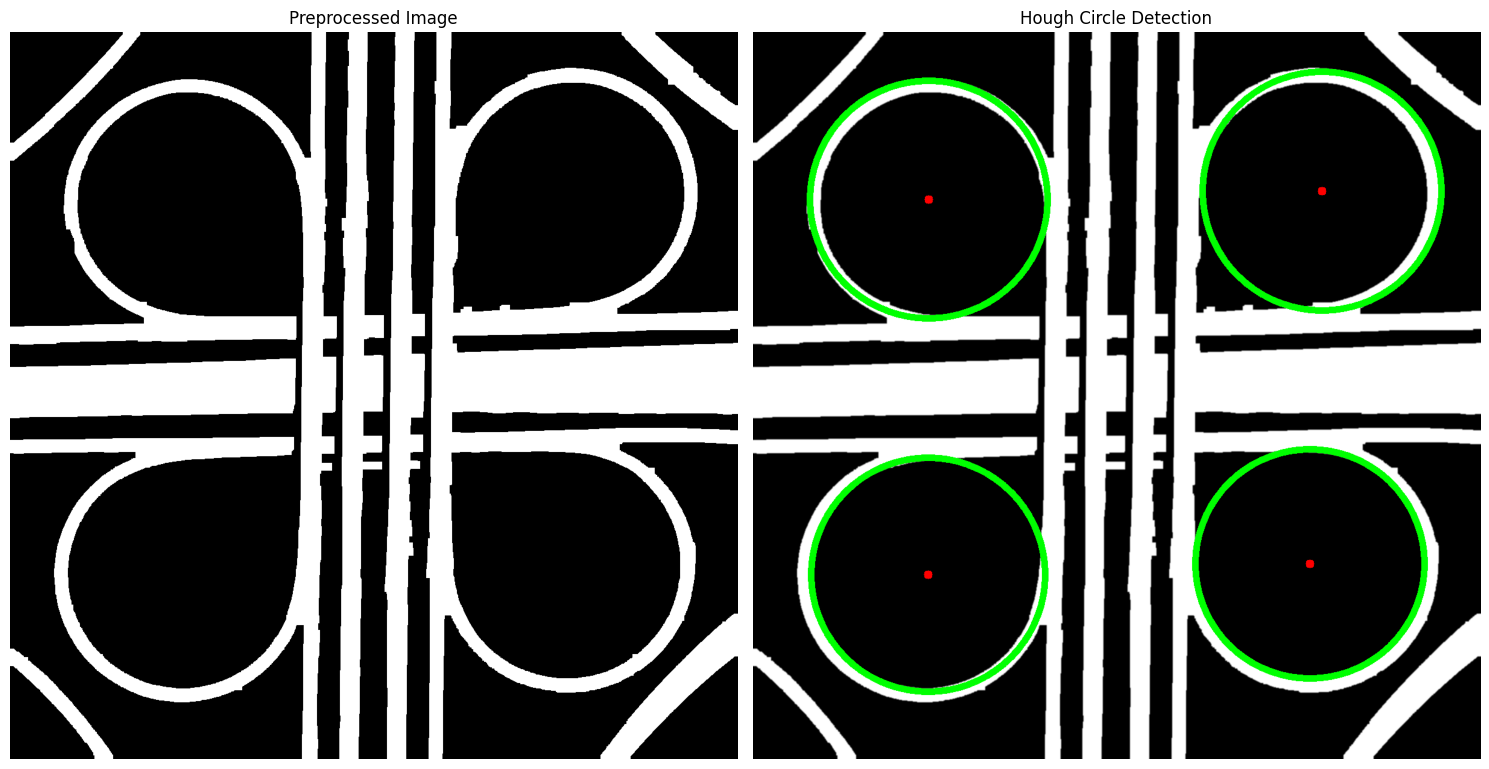

Number of circles/clover leaves detected = 4


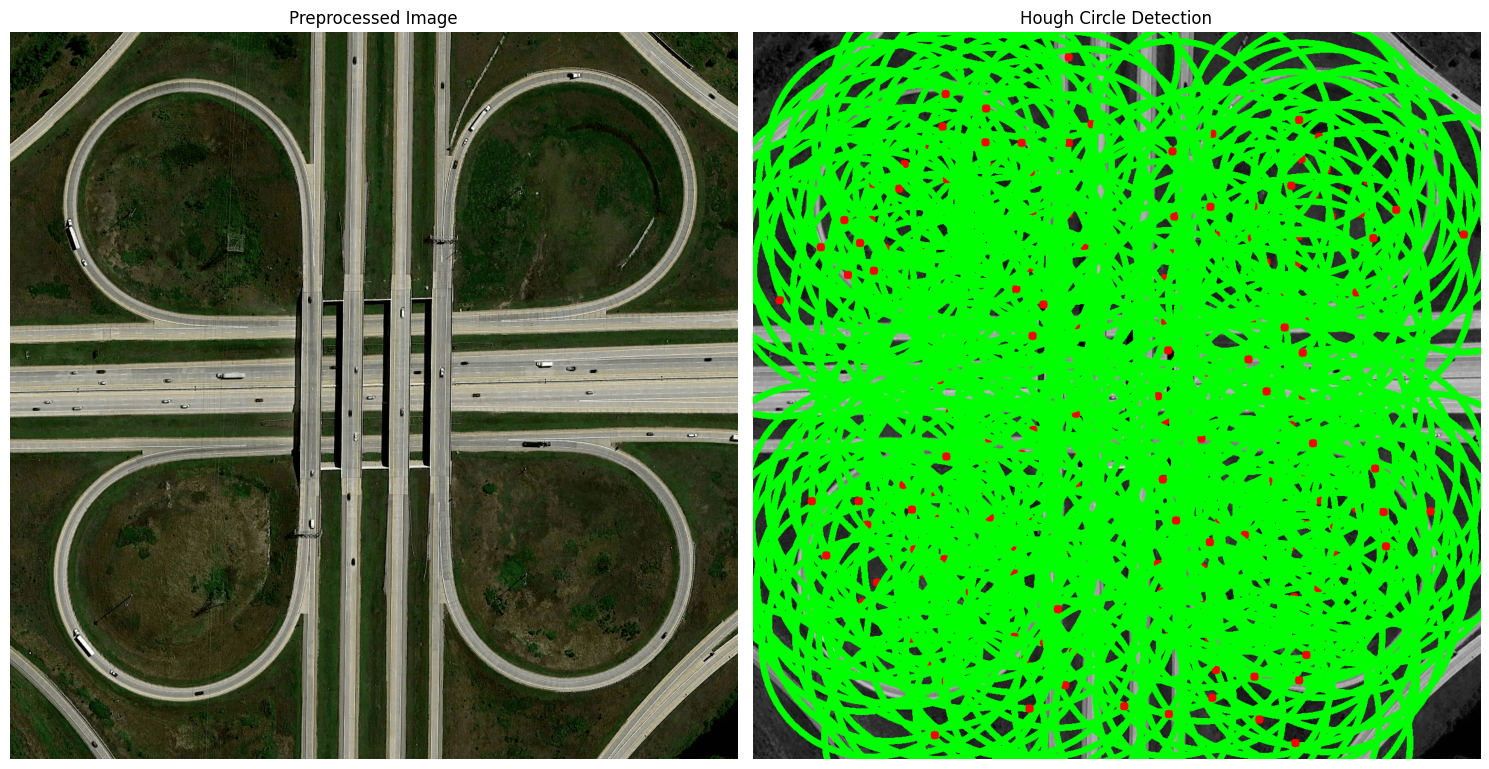

Number of circles/clover leaves detected = 209


In [5]:
def detect_cloverleaves(preprocessed_img, k=3, dp=1.2, min_dist=40, param1=50, param2=30, min_radius=180, max_radius=200):
    fig, ax = plt.subplots(1, 2, figsize=(15, 8))
    if len(preprocessed_img.shape) == 3:
        gray_img = cv2.cvtColor(preprocessed_img, cv2.COLOR_RGB2GRAY)
    else:
        gray_img = np.copy(preprocessed_img)
    
    # Blur image for better detection
    blurred_img = cv2.GaussianBlur(gray_img, (k, k), 0)
    
    # Detect circles
    circles = cv2.HoughCircles(
        blurred_img,
        cv2.HOUGH_GRADIENT,  # Method for circle detection (uses edge gradients to detect circles)
        dp=dp,               # Inverse ratio of accumulator resolution to image resolution.
                            # Lower values -> finer resolution but slower detection; higher values -> faster but less precise.
        minDist=min_dist,    # Minimum distance between detected circle centers.
                            # Smaller values -> more circles can overlap; larger values -> fewer circles, better separation.
        param1=param1,       # High threshold for the Canny edge detector.
                            # Higher values -> detects only strong edges; lower values -> detects weaker edges, may include noise.
        param2=param2,       # Threshold for center detection in the accumulator.
                            # Higher values -> stricter circle detection, fewer false positives; lower values -> more circles detected, may include false positives.
        minRadius=min_radius,  # Minimum radius of detected circles.
                            # Filters out circles smaller than this size.
        maxRadius=max_radius   # Maximum radius of detected circles.
                            # Filters out circles larger than this size.
    )

    # Draw circles on a copy of the input image
    output_img = cv2.cvtColor(blurred_img, cv2.COLOR_GRAY2RGB)           # Convert to RGB for visualization
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(output_img, (i[0], i[1]), i[2], (0, 255, 0), 10)  # Draw circumference (green)
            cv2.circle(output_img, (i[0], i[1]), 2, (255, 0, 0), 10)     # Draw center (red)
        n_circles = len(circles[0])
    else:
        n_circles = 0
    
    ax[0].axis("off")
    ax[0].set_title("Preprocessed Image")
    ax[0].imshow(preprocessed_img, cmap="gray")

    ax[1].axis("off")
    ax[1].set_title(f"Hough Circle Detection")
    ax[1].imshow(output_img)

    plt.tight_layout()
    plt.show()

    return output_img, n_circles

# Detecting circles/clover leaves on preprocesssed image
circle_detected_image, n_circles_detected = detect_cloverleaves(preprocessed_img)
print(f"Number of circles/clover leaves detected = {n_circles_detected}")

# Detecting circles/clover leaves on original image
circle_detected_image_org, n_circles_detected_org = detect_cloverleaves(cloverleaf_img)
print(f"Number of circles/clover leaves detected = {n_circles_detected_org}")

> I used hough circle transform to detect the circles in the image, the minimum and maximum radius to be used for detection by calculating and approx radius of the leaves of interchange by looking at the overall dimension of the image.

> The values for the parameters is justified in the comments

> The challenge I faced was in preprocessing part because without preprocessing the number of circles being detected were so many due to all the noise present so after rigorous preprocessing only by carefully removing all the small artifacts and noises that I was able to reliably detect the circles.

> We can clearly see that without preprocessing a lot of noise is present in the image which leads to the detection of noise as circles so we first need to clean the image to get the output of our choice.

> The algorithm might fail if the clover leaves are overlapping too much or if they’re not round enough since Hough Circle Detection works best for circular shapes. It could also mess up if there’s too much noise or artifacts left after preprocessing, making it detect wrong shapes as circles. Uneven lighting or shadows might cause some leaves to be missed or misidentified. Finally, if the parameters for the circle detection aren’t set right, it might not find all the leaves or it might detect things that aren’t leaves. So it takes a lot of hit and trial to determine the perfect values for detection of circles.

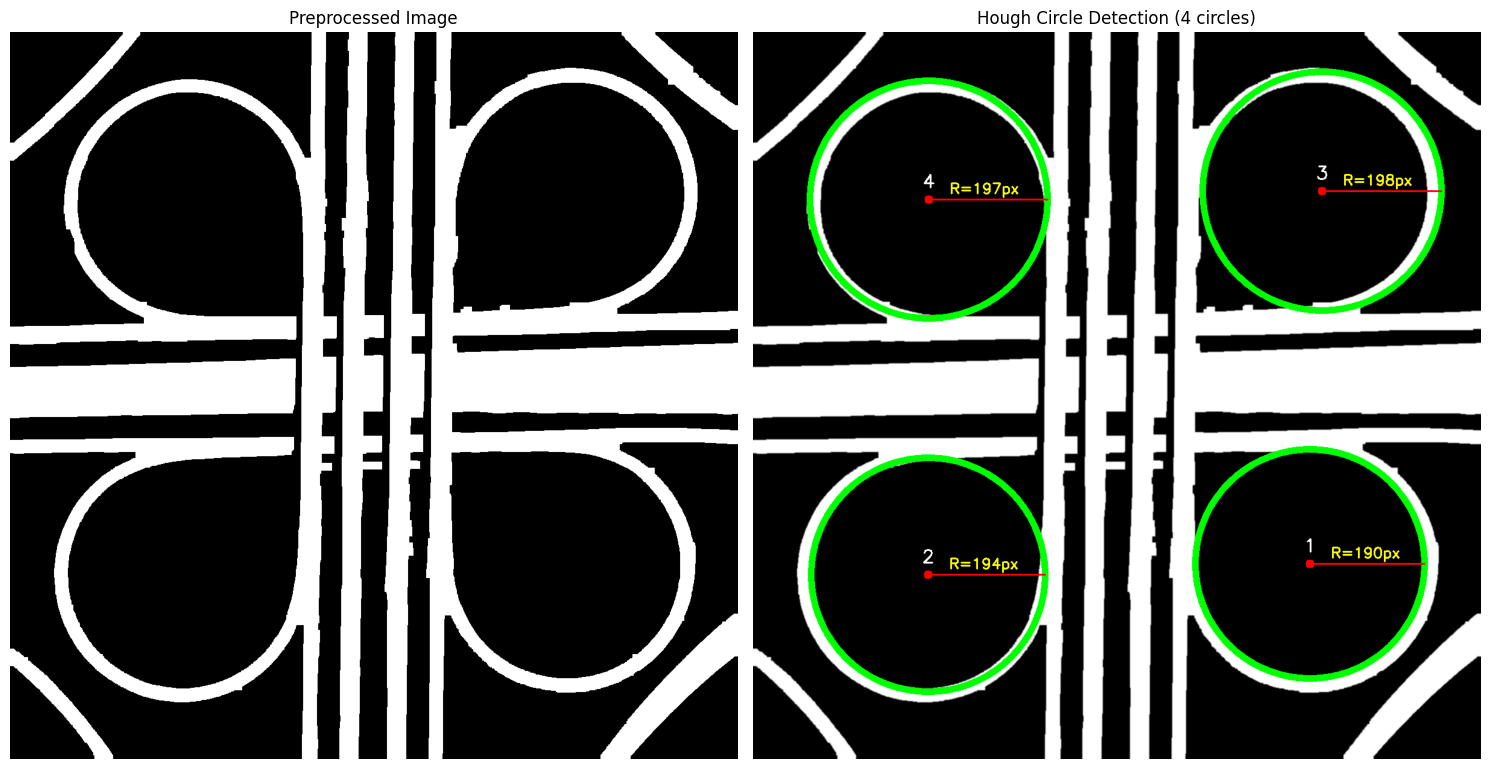

Number of circles detected = 4
	Circle 1 radius = 190 pixels
	Circle 2 radius = 194 pixels
	Circle 3 radius = 198 pixels
	Circle 4 radius = 197 pixels


In [6]:
def calculate_radii(image, k=3, dp=1.2, min_dist=40, param1=50, param2=30, min_radius=180, max_radius=200):
    fig, ax = plt.subplots(1, 2, figsize=(15, 8))
    if len(preprocessed_img.shape) == 3:
        gray_img = cv2.cvtColor(preprocessed_img, cv2.COLOR_RGB2GRAY)
    else:
        gray_img = np.copy(preprocessed_img)

    # Blur image for better detection
    blurred_img = cv2.GaussianBlur(gray_img, (k, k), 0)

    # Detect circles
    circles = cv2.HoughCircles(
        blurred_img,
        cv2.HOUGH_GRADIENT,
        dp=dp,              # Inverse ratio of accumulator resolution to image resolution
        minDist=min_dist,   # Minimum distance between detected circle centers
        param1=param1,      # High threshold for Canny edge detector
        param2=param2,      # Threshold for center detection
        minRadius=min_radius,
        maxRadius=max_radius
    )

    estimated_radii = list()

    # Draw circles and radii on a copy of the input image
    output_img = cv2.cvtColor(blurred_img, cv2.COLOR_GRAY2RGB)           # Convert to RGB for visualization
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for idx, i in enumerate(circles[0, :]):
            center = (i[0], i[1])
            radius = i[2]

            estimated_radii.append(radius)

            # Draw circumference (green)
            cv2.circle(output_img, center, radius, (0, 255, 0), 10)

            # Draw center (red)
            cv2.circle(output_img, center, 2, (255, 0, 0), 10)

            # Draw radius line (blue)
            end_point = (center[0] + radius, center[1])  # Line extending to the right
            cv2.line(output_img, center, end_point, (255, 0, 0), 2)

            # Label the circle with its index
            label_position = (center[0] - 10, center[1] - 20)
            cv2.putText(output_img, f"{idx + 1}", label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

            # Display the radius near the circle
            radius_label_position = (center[0] + 35, center[1] - 10)
            cv2.putText(output_img, f"R={radius}px", radius_label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2)

        n_circles = len(circles[0])
    else:
        n_circles = 0

    ax[0].axis("off")
    ax[0].set_title("Preprocessed Image")
    ax[0].imshow(preprocessed_img, cmap="gray")

    ax[1].axis("off")
    ax[1].set_title(f"Hough Circle Detection ({n_circles} circles)")
    ax[1].imshow(output_img)

    plt.tight_layout()
    plt.show()

    return circles, output_img, estimated_radii

circles, marked_img, estimated_radii = calculate_radii(preprocessed_img)
print(f"Number of circles detected = {len(estimated_radii)}")
for idx, radius in enumerate(estimated_radii):
    print(f"\tCircle {idx + 1} radius = {radius} pixels")


> My choosen method uses the hough circle transform directly given by opencv library. It returns the pixel value for the center of each circle along with the radius value in pixels. Which I used to direclty draw the circles on the image. The main sources of error includes detection of outer and inner boundaries of some circles or if some other circular or skewed circles which might lead to imperfect radius values.

In [13]:
def calculate_circle_pixels_and_area(preprocessed_img, circles):
    results = []

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for idx, i in enumerate(circles[0, :]):
            center = (i[0], i[1])
            radius = i[2]

            # Create a mask for the circle
            mask = np.zeros(preprocessed_img.shape, dtype=np.uint8)
            cv2.circle(mask, center, radius, 255, -1)

            # Count pixels within the circle
            pixel_count = np.sum(mask == 255)

            # Calculate area using formula
            calculated_area = np.pi * radius**2

            results.append({
                "circle_idx": idx + 1,
                "pixel_count": pixel_count,
                "calculated_area": calculated_area
            })

    return results

results = calculate_circle_pixels_and_area(preprocessed_img, circles)
table = PrettyTable()
table.field_names = ["Circle Index", "Pixel Count directly from image", "Calculated Area (Formula)"]
for result in results:
    table.add_row([result["circle_idx"], f"{result["pixel_count"]} sq pixels", f"{result['calculated_area']:.2f} sq pixels"])

print(table)

+--------------+---------------------------------+---------------------------+
| Circle Index | Pixel Count directly from image | Calculated Area (Formula) |
+--------------+---------------------------------+---------------------------+
|      1       |         113369 sq pixels        |    113411.49 sq pixels    |
|      2       |         118213 sq pixels        |    118236.98 sq pixels    |
|      3       |         123121 sq pixels        |    123163.00 sq pixels    |
|      4       |         121905 sq pixels        |    121922.07 sq pixels    |
+--------------+---------------------------------+---------------------------+
